**Importing the Dependencies**

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

**Data Collection and pre-processing**

In [23]:
data = pd.read_csv("car data.csv",encoding='latin-1')
data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [24]:
data.shape

(301, 9)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [26]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [27]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [28]:
print(data.Fuel_Type.value_counts())
print(data.Selling_type.value_counts())
print(data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


**Encoding**

In [29]:
#encoding "Fuel_Type" Column
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#encoding the "Selling_type" Column
data.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

#ncoding the "Transmission" Column
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [30]:
data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
7,s cross,2015,6.50,8.61,33429,1,0,0,0
8,ciaz,2016,8.75,8.89,20273,1,0,0,0
9,ciaz,2015,7.45,8.92,42367,1,0,0,0


In [31]:
data.tail(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
291,brio,2015,5.40,6.10,31427,0,0,0,0
292,jazz,2016,6.40,8.40,12000,0,0,0,0
293,city,2010,3.25,9.90,38000,0,0,0,0
294,amaze,2014,3.75,6.80,33019,0,0,0,0
295,city,2015,8.55,13.09,60076,1,0,0,0
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0
300,brio,2016,5.30,5.90,5464,0,0,0,0


In [32]:
x=data.drop(["Car_Name","Selling_Price"],axis=1)

In [33]:
y=data["Selling_Price"]

In [34]:
print(x)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [35]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


**Splitting data into training and testing set**

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2, random_state=0)

**Model Training**

In [37]:
lin_reg_model=LinearRegression()

In [38]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

**Model Evaluation using Linear Regression Model**

In [39]:
training_data_prediction=lin_reg_model.predict(X_train)

In [40]:
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared Eroor:",error_score)


R squared Eroor: 0.868083094061268


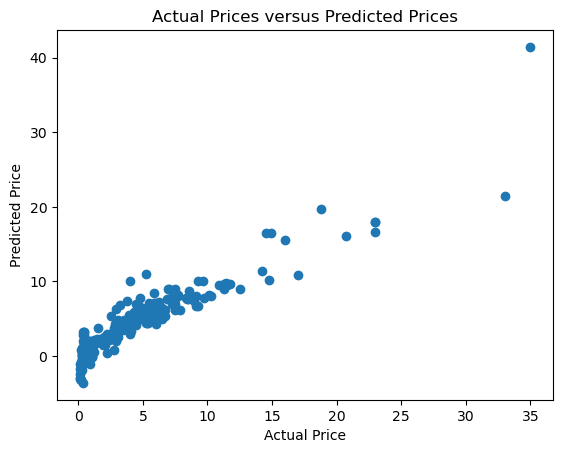

In [41]:
#Visualize the prices and predicted prices
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices versus Predicted Prices")
plt.show()

In [42]:
test_data_prediction=lin_reg_model.predict(X_test)

In [43]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared Eroor:",error_score)

R squared Eroor: 0.9133788577647464


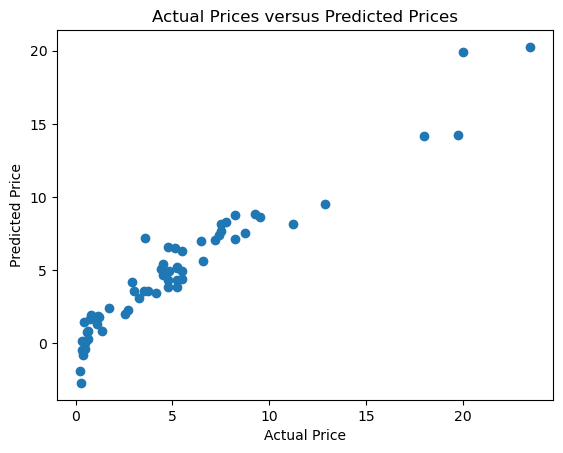

In [44]:
#Visualize the prices and predicted prices
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices versus Predicted Prices")
plt.show()